In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
// Code to be able to number equations in the markdown

<IPython.core.display.Javascript object>

## Explicit finite difference scheme

### Rewriting equation in terms of row (position) and column (time) indicies.

The equation (Eq. 4.0 in doc) given to me by Jack is: 

$$ E^{n+1}_i = \left ( \frac{\Delta t}{\Delta x} \frac{c}{n} \right )^2 (E^{n}_{i+1} - 2E^{n}_{i} + E^{n}_{i-1})-(-2E^{n}_{i} + E^{n-1}_{i}) $$

I want to have the equation in terms of rows and columns, so ultimately I want to rewrite the following equation to be in the form of rows and columns: 

\begin{equation}
E^{n+1}_{i} = rE^{n}_{i-1} + (1-2r)E^{n}_{i} + rE^{n}_{i+1}
\end{equation}

where $ \displaystyle r = \left ( \frac{\Delta t}{\Delta x} \frac{c}{n} \right ) $ and n is the position index and i is the time index (dimensionless)

So I express the above equation as:

\begin{equation}
E^{n}_{i} = rE^{n-1}_{i-1} + (1-2r)E^{n}_{i-1} + rE^{n+1}_{i-1} 
\end{equation}

This is going to calculate a value based on a weighted average. If we think of a matrix, it will use a sum of the previous
time value and it's adjacent values. The reason I chose to modify the equation this way was because I was following a book/video that solved PDEs using Python and they chose to do it this way.

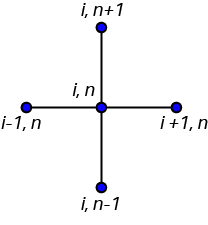

Using the image above, we use i,n;i-1,n;i+1,n and take a weighted average to find i,n+1. However we can define our i,n+1 point to be i,n and then use Eq(2) to find the value.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Defining global arrays for I, E, T_e, T_i, n_e, rho


In [3]:
I = np.zeros((10, 10))
E = np.zeros((10, 10))
T_e = np.zeros((10, 10))
T_i = np.zeros((10, 10))
n_e = np.zeros((10, 10))
rho = np.zeros((10, 10))

## Notes/questions for Jack

* #### Boundary conditions: I was going off of a video/book where their explicit grid looked like this: 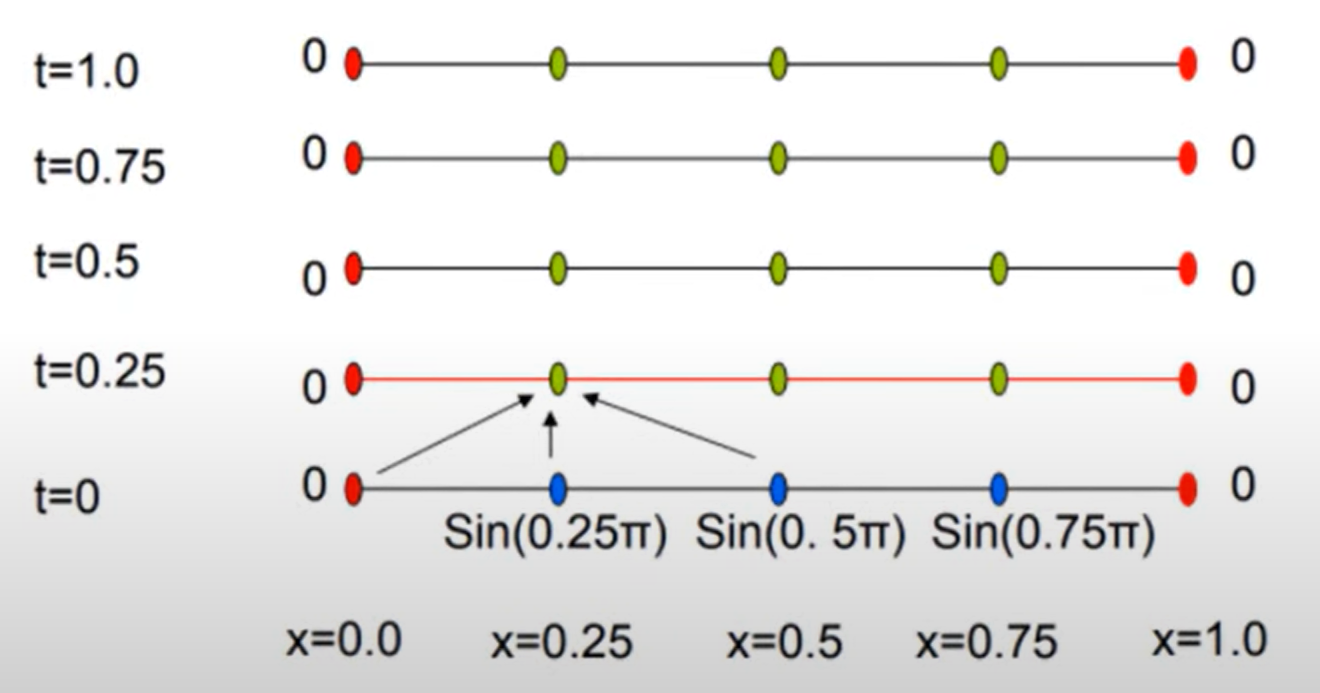

    - So using this grid, the boundary conditions are where the left and right 'walls' are where the red dots are. I know we created ghost cells so would our boundary conditions be the beginning of the ghost cells?
    
* #### Initial conditions: For my initial conditions I chose a random number, but I'm very sure that is wrong. How do I pick a good initial condition?

* #### Building my E matrix: So I just used the length of my spatial and time domains to create my E matrix, but is there a better way to do this?

### Defining parameters needed to solve differential equation: $ \nabla^{2} E - \frac{n^2}{c^2} \frac{\partial^2 E}{\partial t^{2}} = 0$

### Then we explicitly, we update Eq(1)

## Jack Method: $E^{n+1}_{i} = rE^{n}_{i-1} + (1-2r)E^{n}_{i} + rE^{n}_{i+1} - (-2E^{n}_{i} + E^{n-1}_{i})$

### Initialize laser intensity and electric field

In [19]:
# Electric field
E_0 = np.sqrt( (2 * I_0) / (speed_of_light * RefractiveIndex * permittivity_free_space) ) # SI unit is voltage / m

# Laser intensity
I_0 = E_L / (Area_L * T_laser) # laser intensities (SI unit is Joules/(m**2) * s )

In [23]:
I_0

50929581789406.516

In [21]:
E_0

195891384.73574314

In [15]:
speed_of_light = 299792458
nm = 10**-9     # nanometers unit
wavelength = 351 * nm

frequency = speed_of_light/wavelength

angular_frequency = 2 * np.pi * frequency

wavenumber = (2 * np.pi) / wavelength  # wave number will be imaginary part in the coming days (when we do it correctly)



In [45]:
# Unit conversions
ps = 10**-12    # picoseconds unit
nm = 10**-9     # nanometers unit
um = 10 ** -6

# Physical parameters
RefractiveIndex = 1         # unitless
speed_of_light = 299792458  # in m/s not sure if should simplify to 3E8 m/s

# Grid and time parameters
T = 1 * ps              # time in seconds (* picoseonds) (in the future, will represent modeling time)
n_timestep = 1000       # n time step
L = 500 * nm            # length in SI units in meters
n_cells = 10            # number of cells (can also think of as number of grid points)
delta_x = L/n_cells     # spatial time-step (can also think of as grid spacing)
delta_t = T/n_timestep  # time related time-step

x = []  # spatial domain (can also think of as coordinates of grid points)
t = []  # time domain

# Creating arrays for the spatial and time domains. Starting at -2 in order to create ghost cells. And ending with + 3 for the same reason
# The ghost cells are there so that in the matrix we can access all indeces
# To append, using formula Dr. Woo gave me: X_i = delta_x(i + 1/2)
for i in range(-2, n_cells + 3):
    x.append(delta_x * (i + 0.5))

for i in range(-2, n_timestep + 3):
    t.append(delta_t * (i + 0.5))
    
x = np.array(x)
t = np.array(t)
x_len, t_len = len(x), len(t)

print(len(x))
E = np.zeros((x_len, t_len))

# Assignment of boundary conditions in space
R = 25 * um
E_L = 10 * (10 ** -6) # in joules laser energy (10 mu joules)
Area_L = np.pi * R **2 # area of laser
T_laser = 100 * ps # laser pulse time
I_0 = E_L / (Area_L * T_laser) # laser intensities (SI unit is Joules/(m**2) * s )
permittivity_free_space = 8.85418782 * 10 **-12

E_0 = np.sqrt( (2 * I_0) / (speed_of_light * RefractiveIndex * permittivity_free_space) ) # SI unit is voltage / m

# E_0 = ((speed_of_light * RefractiveIndex * permittivity_free_space) / 2 ) 
# right now -2 for ghost cell, not necessarily -2. Correct is -simulation time.


# laser source that covers the 2 ghost cells on the left and on the right. Covers entire simulation domain.
# Just need to take last two points for 
# E_laser_source = E_0 * np.sin(angular_frequency * t[:] * -wavenumber * x[:])  

# E_laser_source 
                              
E[0,:] = boundaryConditions[0]
E[-1, :] = boundaryConditions[1]

# Assignment of boundary conditions in time
boundaryConditions_time = [0, 0]
E[:, 0] = initialConditions # we want all positions at time 0 or first time

# Initial conditions should not be arbitrary. Reflect the symmetry. 
#initialConditions = np.sin(np.pi*x) # random initial condition

r_const = ((delta_t/delta_x) * (speed_of_light/RefractiveIndex)) # our parameter

# These loops will go through the grid. We start at 1 so as to not calculate the
# value when the a time or spatial point is equal to 0.

# 
index = 0
for n in range(2, len(t) - 3):
    t_sim = t[n] # in seconds
    
    # Instantenously defining the boundary conditions/values of ghost cells on the RIGHT:
    E[n, 0] = E_0 * np.sin( angular_frequency * t_sim * -wavenumber * x[0] )
    E[n, 1] = E_0 * np.sin( angular_frequency * t_sim * -wavenumber * x[1] )
    
    # We have no laser on the left, so boundary conditions are just 0
    E[n, -1] = 0
    E[n, -2] = 0
    
    # Initial conditions in time
    E[1, 2:] = 0 
    for i in range(2, len(x) - 3):
        # print('index', index, 'n', n, 'i', i)
        
    
        E[n+1, i] = (r_const ** 2) * (E[n, i-1] + (1 - 2*r_const) * E[n, i] + r_const * E[n, i+1]) - (-2 * E[n, i] + E[n-1,i])
        index += 1


15


IndexError: index 15 is out of bounds for axis 0 with size 15

In [16]:
boundaryConditions

[0, 0]

## Laser source

Plot an animated wave through time.

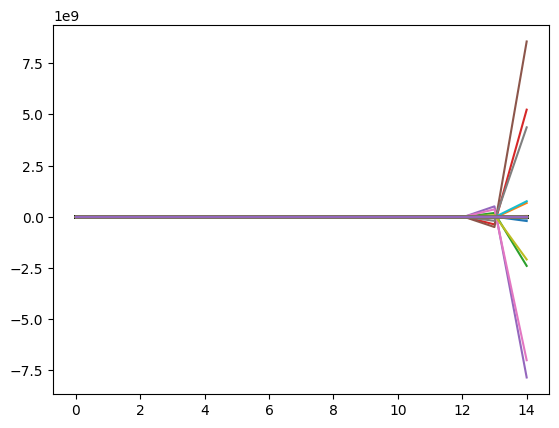

In [5]:
plt.plot(E)
#plt.legend(t)
plt.show()

## Method 2: $E^{n}_{i} = rE^{n-1}_{i-1} + (1-2r)E^{n}_{i-1} + rE^{n+1}_{i-1}$

In [6]:
# Unit conversions
ps = 10**-12    # picoseconds unit
nm = 10**-9     # nanometers unit

# Physical parameters
RefractiveIndex = 1         # unitless
speed_of_light = 299792458  # in m/s not sure if should simplify to 3E8 m/s

# Grid and time parameters
T = 1 * ps              # time in seconds (* picoseonds) (in the future, will represent modeling time)
n_timestep = 1000       # n time step
L = 500 * nm            # length in SI units in meters
n_cells = 10            # number of cells (can also think of as number of grid points)
delta_x = L/n_cells     # spatial time-step (can also think of as grid spacing)
delta_t = T/n_timestep  # time related time-step

x = []  # spatial domain (can also think of as coordinates of grid points)
t = []  # time domain

# Creating arrays for the spatial and time domains. Starting at -2 in order to create ghost cells. And ending with + 3 for the same reason
# The ghost cells are there so that in the matrix we can access all indeces
# To append, using formula Dr. Woo gave me: X_i = delta_x(i + 1/2)
for i in range(-2, n_cells + 3):
    x.append(delta_x * (i + 0.5))

for i in range(-2, n_timestep + 3):
    t.append(delta_t * (i + 0.5))
    
x = np.array(x)
t = np.array(t)
n, m = len(x), len(t)
E = np.zeros((n, m))

# Boundary conditions
boundaryConditions = [0, 0] # left and right boundary all 0s 
E[0,:] = boundaryConditions[0] # left 'wall' of grid
E[-1, :] = boundaryConditions[1] # right 'wall of grid'

# Initial conditions
initialConditions = np.sin(np.pi*x) # random initial condition
E[:, 0] = initialConditions # we want all positions at time 0 or first time

r_const = ((delta_t/delta_x) * (speed_of_light/RefractiveIndex))

# These loops will go through the grid. We start at 1 so as to not calculate the
# value when the a time or spatial point is equal to 0.
for j in range(1, m):
    for i in range(1, n-1):
        E[i, j] = r_const * E[i-1, j-1] * (1 - 2*r_const) * E[i, j-1] + r_const * E[i+1, j-1]
        
E

C:\Users\nickd\AppData\Local\Temp\ipykernel_12428\3905119749.py:49: RuntimeWarning: overflow encountered in scalar multiply
  E[i, j] = r_const * E[i-1, j-1] * (1 - 2*r_const) * E[i, j-1] + r_const * E[i+1, j-1]
C:\Users\nickd\AppData\Local\Temp\ipykernel_12428\3905119749.py:49: RuntimeWarning: invalid value encountered in scalar add
  E[i, j] = r_const * E[i-1, j-1] * (1 - 2*r_const) * E[i, j-1] + r_const * E[i+1, j-1]


array([[-2.35619449e-07,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.85398163e-08,  4.70911672e-07,  8.47057044e-06, ...,
                    nan,             nan,             nan],
       [ 7.85398163e-08,  1.41273908e-06,  1.41175622e-05, ...,
                    nan,             nan,             nan],
       ...,
       [ 1.64933614e-06,  1.08308343e-05,  7.05798305e-05, ...,
                    nan,             nan,             nan],
       [ 1.80641578e-06,  1.17726259e-05, -8.40331717e-09, ...,
                    nan,             nan,             nan],
       [ 1.96349541e-06,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

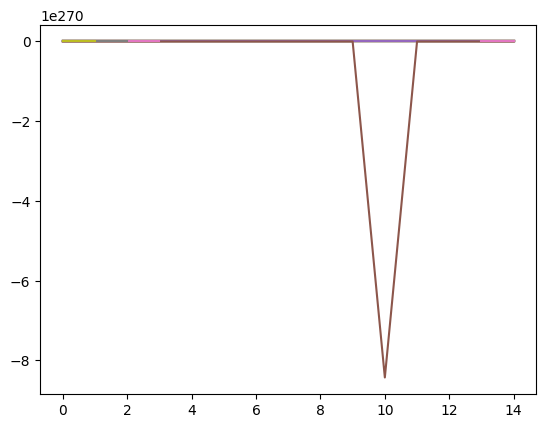

In [7]:
plt.plot(E)
#plt.legend(t)
plt.show()